In [1]:
%pip install torch torchvision torchaudio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 64.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [8]:
import torch
import torch.nn as nn
from torchvision import transforms

# Определяем девайс CPU или GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Используется: {device}")

# Определение сверточного автоэнкодера (CAE)
class CAE(nn.Module):
    def __init__(self):
        super(CAE, self).__init__()

        # Энкодер
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),

            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),

            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )

        # Декодер
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(128, 64, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),

            nn.ConvTranspose2d(64, 32, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),

            nn.ConvTranspose2d(32, 1, kernel_size=4, stride=2, padding=1),
            nn.Sigmoid(),

            nn.Conv2d(1, 1, kernel_size=5, stride=1, padding=2),
            nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=0),
            nn.Conv2d(1, 1, kernel_size=3, stride=1, padding=0)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Инициализация модели
model = CAE().to(device)

Используется: cpu


In [9]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Параметры датасета
batch_size = 256

# Преобразователь датасета
transform = transforms.ToTensor()

# Подгружаем MNIST обучающую и тестовую выборки
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim

# Параметры модели
epochs = 50
learning_rate = 1e-3

# Инициализация критерия, оптимизатора и планировщика
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5)

# Обучение
def train():
  model.train()

  train_loss = 0

  for data, _ in train_loader:
      data = data.to(device)
      output = model(data)
      loss = criterion(output, data)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      train_loss += loss.item()
  scheduler.step()
  print(f"Эпоха {epoch + 1}/{epochs}, Потеря: {train_loss / len(train_loader):.4f}")

# Обучение модели
for epoch in range(epochs):
    train()

# Сохранение модели в файл
torch.save(model.state_dict(), './model/mnist_model3.pth')

Эпоха 1/50, Потеря: 0.0449
Эпоха 2/50, Потеря: 0.0117
Эпоха 3/50, Потеря: 0.0081
Эпоха 4/50, Потеря: 0.0065
Эпоха 5/50, Потеря: 0.0055
Эпоха 6/50, Потеря: 0.0049
Эпоха 7/50, Потеря: 0.0043
Эпоха 8/50, Потеря: 0.0038
Эпоха 9/50, Потеря: 0.0034
Эпоха 10/50, Потеря: 0.0030
Эпоха 11/50, Потеря: 0.0027
Эпоха 12/50, Потеря: 0.0026
Эпоха 13/50, Потеря: 0.0024
Эпоха 14/50, Потеря: 0.0023
Эпоха 15/50, Потеря: 0.0022
Эпоха 16/50, Потеря: 0.0021
Эпоха 17/50, Потеря: 0.0020
Эпоха 18/50, Потеря: 0.0020
Эпоха 19/50, Потеря: 0.0019
Эпоха 20/50, Потеря: 0.0018
Эпоха 21/50, Потеря: 0.0017
Эпоха 22/50, Потеря: 0.0017
Эпоха 23/50, Потеря: 0.0016
Эпоха 24/50, Потеря: 0.0016
Эпоха 25/50, Потеря: 0.0016
Эпоха 26/50, Потеря: 0.0015
Эпоха 27/50, Потеря: 0.0015
Эпоха 28/50, Потеря: 0.0015
Эпоха 29/50, Потеря: 0.0015
Эпоха 30/50, Потеря: 0.0015
Эпоха 31/50, Потеря: 0.0014
Эпоха 32/50, Потеря: 0.0014
Эпоха 33/50, Потеря: 0.0014
Эпоха 34/50, Потеря: 0.0013
Эпоха 35/50, Потеря: 0.0013
Эпоха 36/50, Потеря: 0.0013
Э

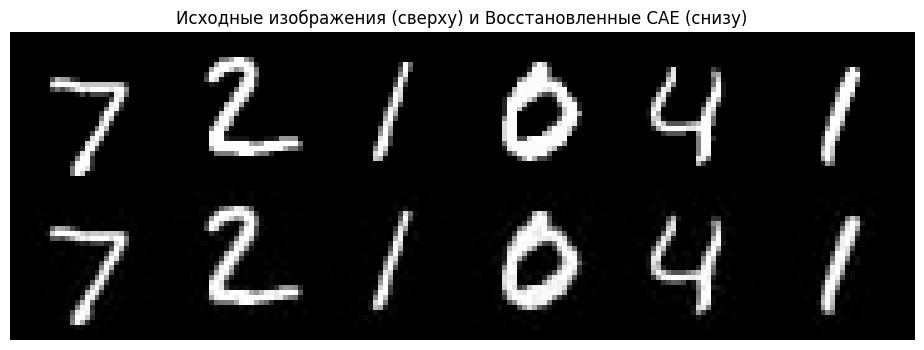

In [20]:
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Загрузка натреннированой модели из файла
model.load_state_dict(torch.load('./model/mnist_model3.pth'))

# Восстановление изображений из тестового набора
def visualize_reconstructions():
    model.eval()

    with torch.no_grad():
        data, _ = next(iter(test_loader))
        data = data.to(device)
        recon = model(data)

        # Выбираем первые 6 изображений
        n = 6
        comparison = torch.cat([data[:n],
                                recon.view(batch_size, 1, 28, 28)[:n]])
        grid_img = torchvision.utils.make_grid(comparison, nrow=n)

        plt.figure(figsize=(16,4))
        plt.imshow(grid_img.permute(1, 2, 0).cpu().numpy(), cmap='gray')
        plt.title("Исходные изображения (сверху) и Восстановленные CAE (снизу)")
        plt.axis('off')
        plt.show()

visualize_reconstructions()